## Library

In [10]:
import pandas as pd

from relative_path import PATH_DATA
from exploration_data import VisualizeMissing, EvalMissingData

## Standard

In [11]:
TRACK_DATA = PATH_DATA / "tracks.parquet"
ARTISTS_DATA = PATH_DATA / "artists.parquet"

## Reading the Data

In [12]:
df_tracks = pd.read_parquet(TRACK_DATA)
df_artists = pd.read_parquet(ARTISTS_DATA)

In [13]:
from pandas import DataFrame
import math
from datetime import date
import matplotlib.pyplot as plt

from typing import Any

TODAY = date.today()
DATE_FORMAT = str(TODAY.year) + str(TODAY.month) + str(TODAY.day)
from relative_path import OUTPUT_EXPLORE, OUTPUT_MAIN, OUTPUT_FEATURE, PATH_OUTPUT
# Turn interactive plotting off
plt.ioff()

In [14]:
from pandas_profiling import ProfileReport
import seaborn as sns

In [15]:
class EvaluateDataset:
    """ Standard evaluation for the dataframe. """
    def __init__(
            self, 
            input_df:DataFrame, 
            data_name:str, 
            
            export_plot:bool=False, 
            show_plot:bool=False,
        ) -> None:
        
        self.df:DataFrame = input_df
        self.name:str = data_name.title()
        self._profile = ProfileReport(self.df, title=self.name)
        
        self._export = export_plot
        self._show = show_plot
        
        self._color = "orange"
        self._figsize = (16,10) 
        self._dpi = 720
        self._aspect = 3
        
        self.output_path = OUTPUT_EXPLORE
        plt.ioff()
        
    @property
    def dataframe(self):
        return self.df
        
    @property
    def profile(self):
        return self._profile
            
    def get_profiling(self) -> None:
        profile_name = f"{DATE_FORMAT}-{self.name}Data_Profiling.html"
        if self._export:
            self._profile.to_file(self.output_path / profile_name)
        
    def get_all_corr(self, show:bool=False):
        all_correlation = ["spearman", "kendall", "pearson"]
    
        for corr in all_correlation:
            plt.figure(figsize=self._figsize, dpi=self._dpi)
            df_corr = self.df.corr(method=corr)
            
            fig = sns.heatmap(df_corr, annot=True, cmap="inferno", center=0)
            fig.set(title=f"{self.name} - {corr.title()} Correlation Heatmap")
            
            fig_name = f"{DATE_FORMAT}-{self.name}Data_Corr{corr.title()}.png"
            self._saving_and_showing(_name = fig_name, _show = show)
    
    def get_all_hist(self, show:bool=False):
        num_in_df = self.df.select_dtypes(include="number")
        row_size = math.ceil(len(num_in_df.columns) / 4) * 5
        fig = num_in_df.hist(bins=20, color=self._color, figsize=(30, row_size))
        
        fig_name = f"{DATE_FORMAT}-{self.name}Data_Hist.png"
        self._saving_and_showing(_name = fig_name, _show = show)

        
    def get_category_hist(self, column_name:str, show:bool=False):
        fig = sns.displot(self.df[column_name], discrete=True, aspect=self._aspect, kind='hist', color=self._color)
        
        # Setting the x label
        xlabel = column_name.replace("_", " ").title()
        
        # Setting the title
        title_name = f"{self.name.title()} Data - Count over {column_name.title()}"
        fig.set(title=title_name, xlabel=xlabel)
        fig.tight_layout()
        
        fig_name = f"{DATE_FORMAT}-{self.name}Data_{column_name.title()}_CategoryHist.png"
        self._saving_and_showing(_name = fig_name, _show = show)
        
    def _saving_and_showing(self, _name:str, _show:bool):
        if self._export:
            plt.savefig(self.output_path / _name)
        
        # Show or Hide Plot
        if self._show or _show:
            plt.show()
        else:
            plt.close("all")

## Evaluating Tracks Data

In [16]:
eval_tracks = EvaluateDataset(df_tracks, "Tracks", export_plot=True)

In [17]:
eval_tracks.get_all_corr(show=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


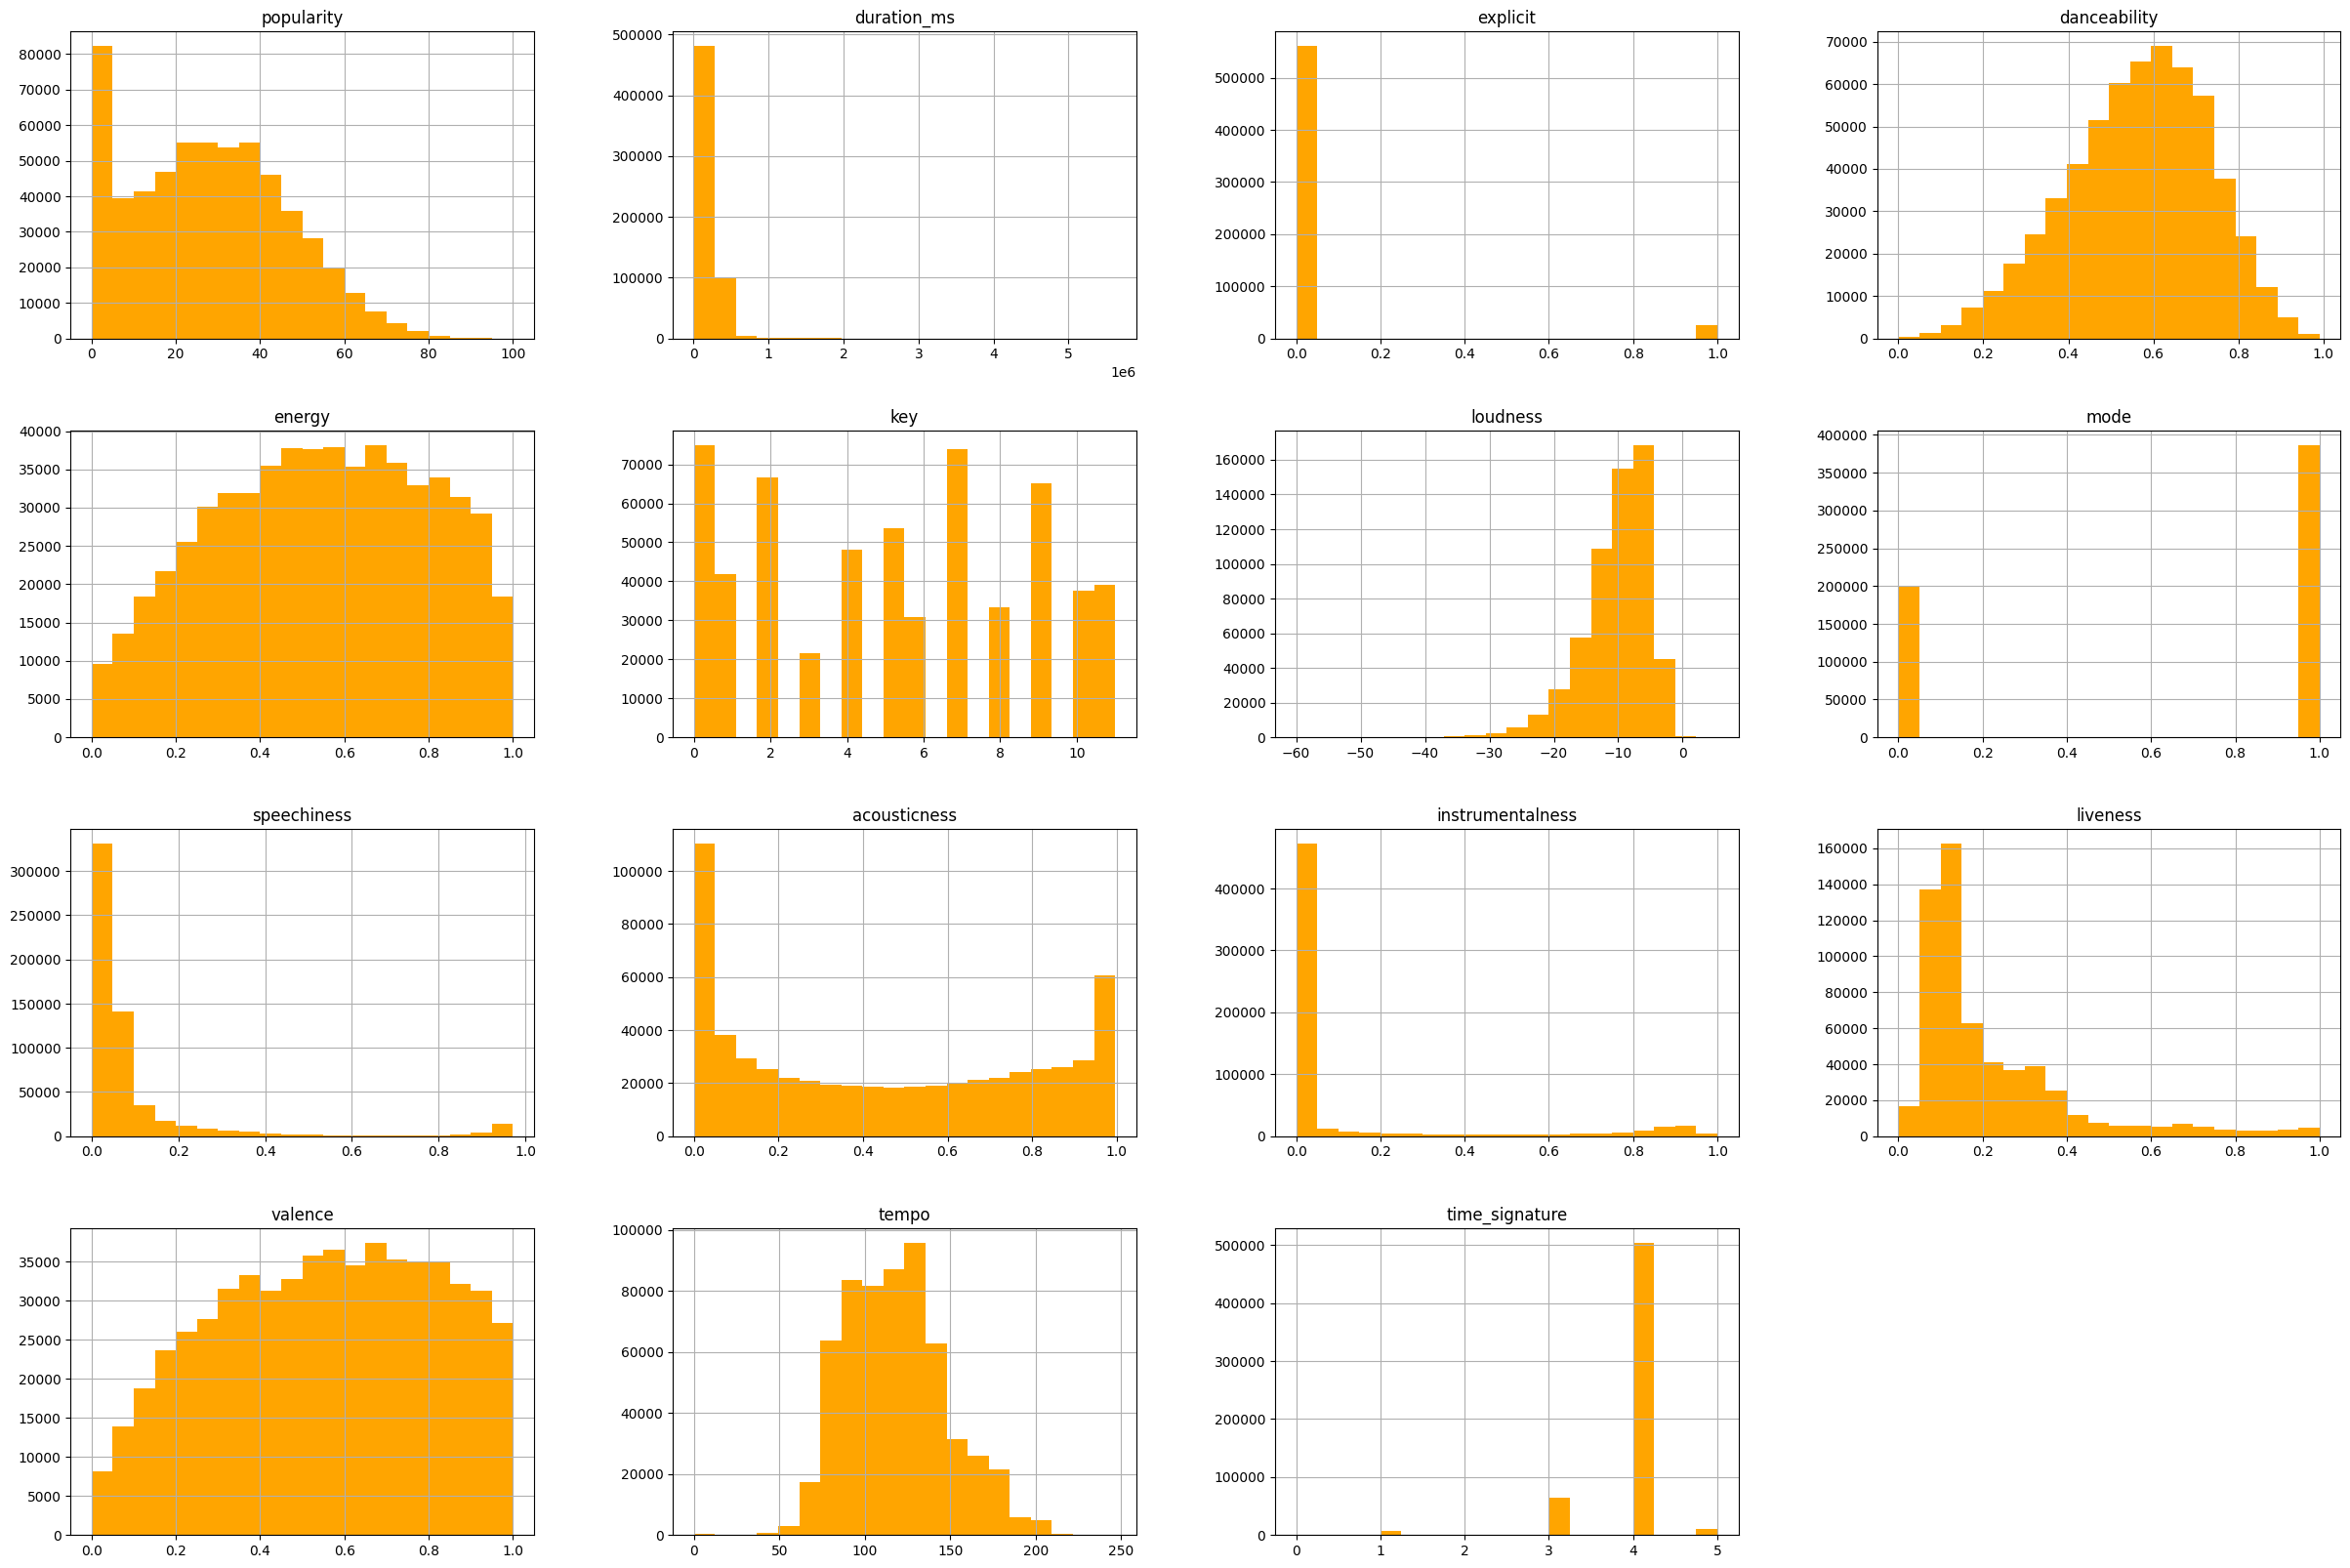

In [18]:
eval_tracks.get_all_hist(show=True)

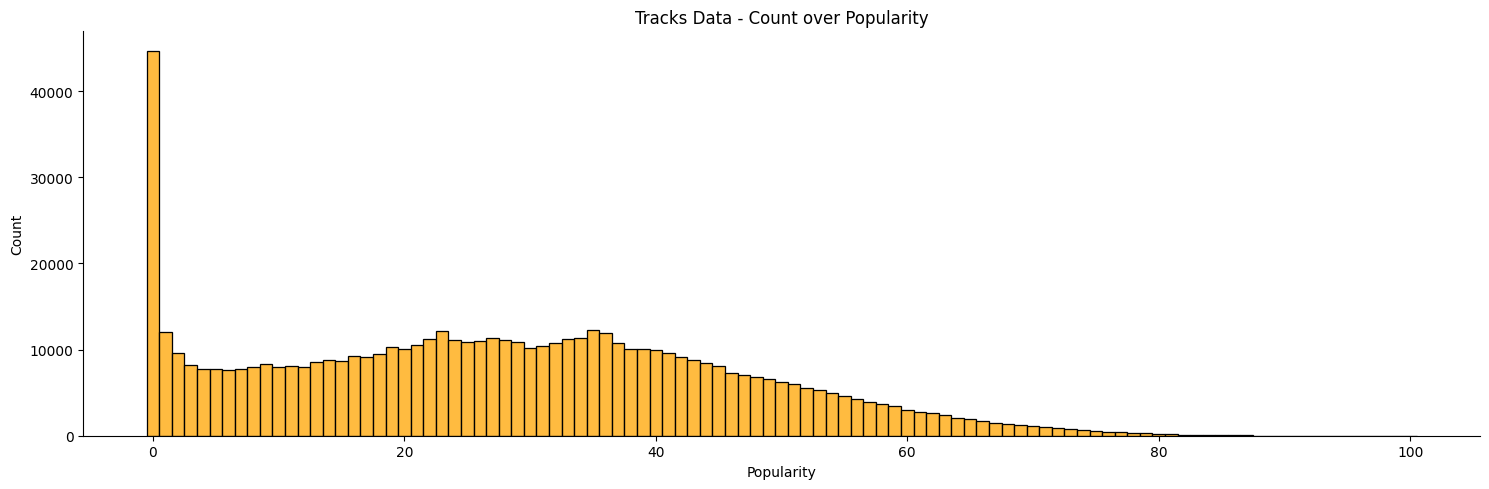

In [19]:
eval_tracks.get_category_hist(column_name="popularity",show=True)

In [20]:
eval_tracks.dataframe.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [28]:
eval_tracks.get_profiling()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Evaluating Artist Data

In [21]:
eval_artists = EvaluateDataset(df_artists, "Artists", export_plot=True)

In [24]:
eval_artists.get_all_corr(show=True)

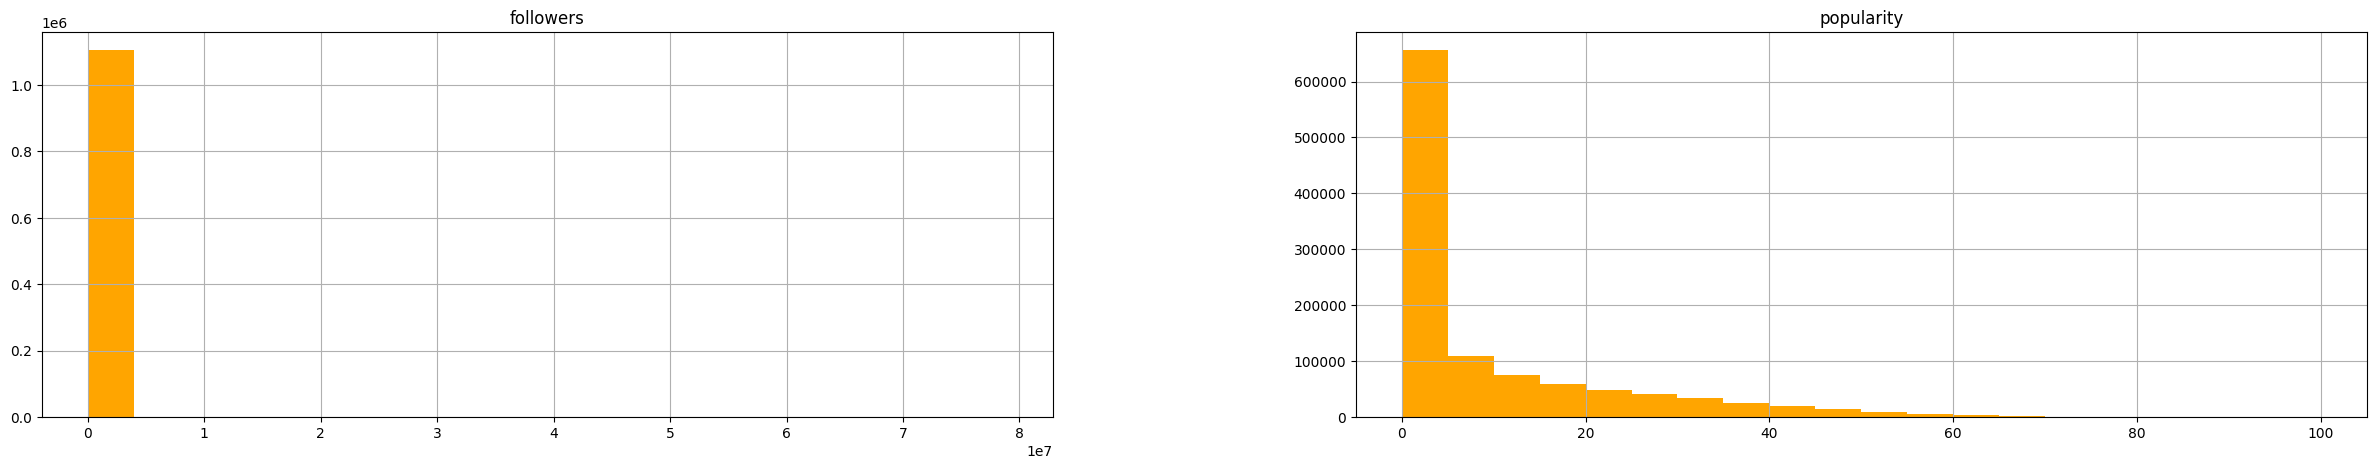

In [25]:
eval_artists.get_all_hist(show=True)

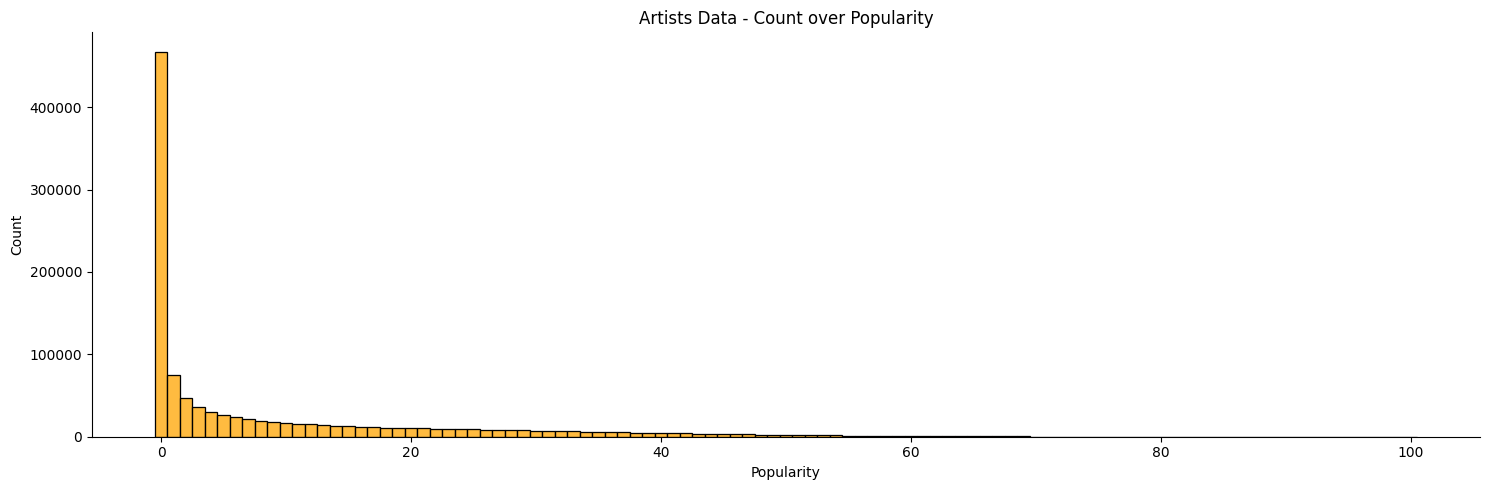

In [26]:
eval_artists.get_category_hist(column_name="popularity", show=True)

In [29]:
eval_artists.get_profiling()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]